# Original Model

I choose a model from Internet and did'nt change any parameter, but `StandardScaler()` both `X` & `Y`

In [1]:
import pandas as pd
import numpy as np
import keras as kr
import tensorflow as tf
from keras.models import Sequential
from keras.layers import Dense, Activation
from keras.optimizers import SGD
from sklearn.preprocessing import StandardScaler
from sklearn import model_selection
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
md_para = pd.read_csv('../data/substituted_benzene_para_md.csv',index_col=0,header=0)
md_orth = pd.read_csv('../data/substituted_benzene_orth_md.csv',index_col=0,header=0)
md_meta = pd.read_csv('../data/substituted_benzene_meta_md.csv',index_col=0,header=0)
mddata = pd.concat([md_meta,md_orth,md_para],axis=0,join='inner',ignore_index=True)

gammadata_meta = pd.read_csv('../data/substituted_benzene_meta_gamma.csv',index_col=0,header=0)
gammadata_orth = pd.read_csv('../data/substituted_benzene_orth_gamma.csv',index_col=0,header=0)
gammadata_para = pd.read_csv('../data/substituted_benzene_para_gamma.csv',index_col=0,header=0)
gammadata = pd.concat([gammadata_meta,gammadata_orth,gammadata_para],axis=0,join='inner',ignore_index=True)

In [3]:
def dfclean(data):
    temp = data[data.T[data.dtypes!=np.object].index]
    kk=[]
    for column in temp.columns:
        if len(set(temp[column]))<4:
            kk.append(column)
    result = temp.drop(columns=kk)
    return result

In [4]:
rawdataset = pd.merge(mddata, gammadata, on='cindex')
dataset = dfclean(rawdataset)

Y = dataset.iloc[:, -1]
Y = np.array(Y, dtype = np.float32).reshape(-1,1)


X = dataset.iloc[:, 1:-1]
X = np.array(X, dtype = np.float32)

Y= StandardScaler().fit_transform(Y)
X= StandardScaler().fit_transform(X)

In [5]:
X_train, X_test, y_train, y_test = model_selection.train_test_split(X, Y, test_size=0.25, random_state=42)
model = Sequential()
model.add(Dense(units = 50, input_dim = X.shape[1]))
model.add(Activation("sigmoid"))
model.add(Dense(units = 1))
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 50)                47300     
_________________________________________________________________
activation (Activation)      (None, 50)                0         
_________________________________________________________________
dense_1 (Dense)              (None, 1)                 51        
Total params: 47,351
Trainable params: 47,351
Non-trainable params: 0
_________________________________________________________________


In [6]:
model.compile(loss = 'mean_squared_error', optimizer = SGD(lr = 0.01, momentum = 0.9, nesterov = True),metrics=['accuracy'])
history = model.fit(X_train, y_train, epochs = 100, batch_size = 32,validation_data = (X_test, y_test),verbose=0)
score = model.evaluate(X_test, y_test, verbose = 0)
print('Test loss:', score[0])
print('Test accuracy:', score[1])
y_pred = model.predict(X_test)
rms = (np.mean((y_test - y_pred) ** 2)) ** 0.5
print("Neural Network RMS", rms)

Test loss: 1.032949447631836
Test accuracy: 0.0
Neural Network RMS 1.0163412063041801


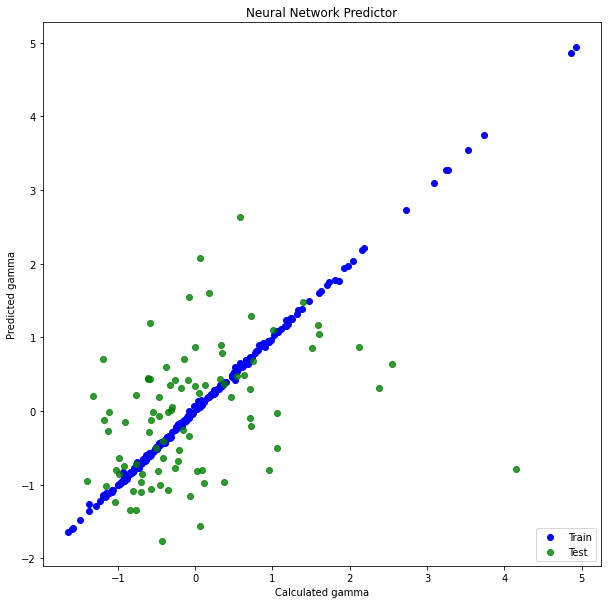

In [7]:
plt.figure(figsize=(10,10))
plt.scatter(y_train, model.predict(X_train), label = 'Train', c = 'blue')
plt.title('Neural Network Predictor')
plt.xlabel('Calculated gamma')
plt.ylabel('Predicted gamma')
plt.scatter(y_test, model.predict(X_test), c = 'green', label = 'Test', alpha = 0.8)
plt.legend(loc = 4)
#plt.savefig('Neural Network Predictor.png', dpi=500)
plt.show()

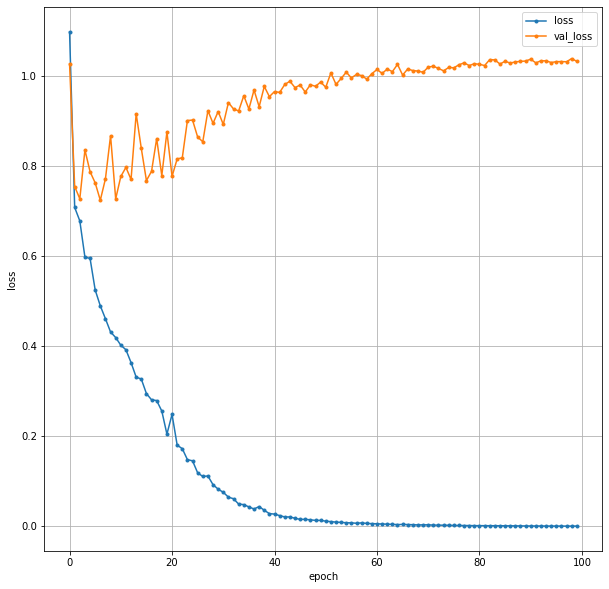

In [8]:
loss = history.history['loss']
val_loss = history.history['val_loss']
epochs = len(loss)
plt.figure(figsize=(10,10))
plt.plot(range(epochs), loss, marker = '.', label = 'loss')
plt.plot(range(epochs), val_loss, marker = '.', label = 'val_loss')
plt.legend(loc = 'best')
plt.grid()
plt.xlabel('epoch')
plt.ylabel('loss')
#plt.savefig('loss & val_loss for epochs.png', dpi=500)
plt.show()

## Conclusion

overfit too much, and the loss is not small. change the learning rate see whah will happen